In [10]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import os
import sys
import numpy as np
from scipy.stats import linregress


csv0 = '../Presentation/clean/clean_od15.csv'
clean_od_2015 = pd.read_csv(csv0)

csv1 = '../Presentation/clean/clean_od16.csv'
clean_od_2016 = pd.read_csv(csv1)

csv2 = '../Presentation/clean/PAC_Scores_2015_group.csv'
PAC_Scores_2015_group = pd.read_csv(csv2)

csv3 = '../Presentation/clean/PAC_Scores_2016_group.csv'
PAC_Scores_2016_group = pd.read_csv(csv3)


csv7 = '../Presentation/clean/op_pac_final_15.csv'
op_pac_final_15 = pd.read_csv(csv7)

csv8 = '../Presentation/clean/op_pac_final_16.csv'
op_pac_final_16 = pd.read_csv(csv8)

csv9 = '../Presentation/clean/state_op_final_15.csv'
state_op_final_15 = pd.read_csv(csv9)

csv10 = '../Presentation/clean/state_op_final_16.csv'
state_op_final_16 = pd.read_csv(csv10)



In [22]:
PAC_Scores_2015_group.head(3)
PAC_Scores_2015_group = PAC_Scores_2015_group.drop(45, axis=0)
PAC_Scores_2015_group.sort_values('Opioid Claim Count', ascending=False)

,Group PAC ID,Measure Performance Rate,Year,State,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate
217,8820900749,68.875000,2015,WI,294477.0,11139.0,3.782638
117,4880593722,66.125000,2015,PA,214629.0,9476.0,4.415060
69,3072425495,66.500000,2015,WI,114369.0,6674.0,5.835497
232,9436062296,64.250000,2015,AL,91083.0,6246.0,6.857482
219,8921273038,62.750000,2015,CO,121893.0,5760.0,4.725456
174,7113830142,63.375000,2015,MN,87072.0,4697.0,5.394386
42,1951213057,64.000000,2015,MN,104506.0,4664.0,4.462902
179,7416100672,66.625000,2015,FL,37454.0,4242.0,11.325893
128,5395657001,63.875000,2015,PA,101356.0,4018.0,3.964245
25,1052348612,73.250000,2015,WI,119151.0,3812.0,3.199302


In [23]:
PAC_Scores_2015_group.sort_values('Measure Performance Rate', ascending=False)
PAC_Scores_2015_group = PAC_Scores_2015_group.drop(159, axis=0)

In [24]:
PAC_Scores_2015_group["Opioid Prescribing Rate"] = PAC_Scores_2015_group["Opioid Prescribing Rate"].round(2)
PAC_Scores_2016_group["Opioid Prescribing Rate"] = PAC_Scores_2016_group["Opioid Prescribing Rate"].round(2)

In [25]:
PAC_Scores_2016_group.head(3)

,Group PAC ID,Measure Performance Rate,Year,State,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate
0,42105678,67.625,2016,PA,612.0,25.0,4.08
1,42122244,64.250,2016,CA,8843.0,457.0,5.17
2,42128548,66.250,2016,TX,11588.0,1448.0,12.50


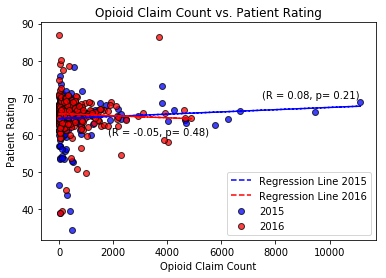

In [55]:
fig, ax = plt.subplots()

#Scatter Plot 2015
x_axis15 = PAC_Scores_2015_group['Opioid Claim Count']
y_axis15 = PAC_Scores_2015_group['Measure Performance Rate']
plt.scatter(x_axis15, y_axis15, marker="o", facecolors="blue", edgecolors="black", alpha=0.75, label="2015")

slope, intercept, r_value, p_value, std_err = linregress(x_axis15,y_axis15)
fit = slope * x_axis15 + intercept
plt.plot(x_axis15, fit, 'b--', label="Regression Line 2015")

stat_value = '(R = ' + str(round(r_value,2)) + ', p= '+ str(round(p_value,2)) + ')'
plt.text(7500, 70, stat_value)

#Scatter Plot 2016
x_axis16 = PAC_Scores_2016_group['Opioid Claim Count']
y_axis16 = PAC_Scores_2016_group['Measure Performance Rate']
plt.scatter(x_axis16, y_axis16, marker="o", facecolors="red", edgecolors="black", alpha=0.75, label="2016")

slope, intercept, r_value, p_value, std_err = linregress(x_axis16,y_axis16)
fit = slope * x_axis16 + intercept
plt.plot(x_axis16, fit, 'r--', label="Regression Line 2016")

stat_value = '(R = ' + str(round(r_value,2)) + ', p= '+ str(round(p_value,2)) + ')'
plt.text(1800, 60, stat_value)

#Add title to our scatter plot along with an x-axis and y-axis title
plt.title("Opioid Claim Count vs. Patient Rating")
plt.xlabel("Opioid Claim Count")
plt.ylabel("Patient Rating")

plt.legend(loc='lower right')

plt.savefig('../Presentation/graphs/opd_claimcount_v_ptR.png')

plt.show()

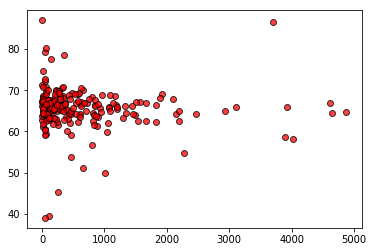

In [27]:
#Scatter Plot 2016
x_axis16 = PAC_Scores_2016_group['Opioid Claim Count']
y_axis16 = PAC_Scores_2016_group['Measure Performance Rate']
plt.scatter(x_axis16, y_axis16, marker="o", facecolors="red", edgecolors="black", alpha=0.75, label="2016")


<function matplotlib.pyplot.show(*args, **kw)>

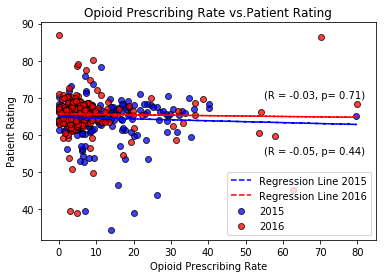

In [63]:


#Scatter Plot 2015
x_axis15 = PAC_Scores_2015_group['Opioid Prescribing Rate']
y_axis15 = PAC_Scores_2015_group['Measure Performance Rate']
plt.scatter(x_axis15, y_axis15, marker="o", facecolors="blue", edgecolors="black", alpha=0.75, label="2015")

slope, intercept, r_value, p_value, std_err = linregress(x_axis15,y_axis15)
fit = slope * x_axis15 + intercept
plt.plot(x_axis15, fit, 'b--', label="Regression Line 2015")

stat_value = '(R = ' + str(round(r_value,2)) + ', p= '+ str(round(p_value,2)) + ')'
plt.text(55, 55, stat_value)


#Scatter Plot 2016
x_axis16 = PAC_Scores_2016_group['Opioid Prescribing Rate']
y_axis16 = PAC_Scores_2016_group['Measure Performance Rate']
plt.scatter(x_axis16, y_axis16, marker="o", facecolors="red", edgecolors="black", alpha=0.75, label="2016")

slope, intercept, r_value, p_value, std_err = linregress(x_axis16,y_axis16)
fit = slope * x_axis16 + intercept
plt.plot(x_axis16, fit, 'r--', label="Regression Line 2016")

stat_value = '(R = ' + str(round(r_value,2)) + ', p= '+ str(round(p_value,2)) + ')'
plt.text(55, 70, stat_value)

#Add title to our scatter plot along with an x-axis and y-axis title
plt.title("Opioid Prescribing Rate vs.Patient Rating")
plt.xlabel("Opioid Prescribing Rate")
plt.ylabel("Patient Rating")

plt.legend(loc='lower right')

plt.savefig('../Presentation/graphs/opd_Prescr_R_v_ptR.png')
            
plt.show